# Predicting Monopoly Hotel Prices

If you've played the game
[Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)
you will know that some properties cost more than others, and 
the rent charged for a Hotel.

There's a relationship between them. Let's find out what it is.

The set of properties is on an HTML table here:
http://www.jdawiseman.com/papers/trivia/monopoly-rents.html

In [80]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
url = 'http://www.jdawiseman.com/papers/trivia/monopoly-rents.html'
dfs = pd.read_html(url, header=1, index_col=0)
dfs = dfs[0]

In [13]:
# There should only be one DataFrame.
# Make a copy of it and drop all the rows with NaN values (these
# are the railway stations and the utilities)

In [81]:
# The index is the name of the property.
dfs.dropna(inplace = True)
dfs

,Cost,M’tg,Site,1 hse,2 hses,3 hses,4 hses,Hotel
Property,,,,,,,,
Old Kent Road,60,30,2,10.0,30.0,90.0,160.0,250.0
Whitechapel Road,60,30,4,20.0,60.0,180.0,320.0,450.0
The Angel Islington,100,50,6,30.0,90.0,270.0,400.0,550.0
Euston Road,100,50,6,30.0,90.0,270.0,400.0,550.0
Pentonville Road,120,60,8,40.0,100.0,300.0,450.0,600.0
Pall Mall,140,70,10,50.0,150.0,450.0,625.0,750.0
Whitehall,140,70,10,50.0,150.0,450.0,625.0,750.0
Northumberland Avenue,160,80,12,60.0,180.0,500.0,700.0,900.0
Bow Street,180,90,14,70.0,200.0,550.0,750.0,950.0


In [ ]:
# Have a look at the column names
#  - "1 hse" means the rent when there is one house on the property
#  - "M'tg" means the price to mortgage the property

In [82]:
# Make a dataframe X which contains the "Site" column
site = dfs[['Site']]
site

,Site
Property,
Old Kent Road,2
Whitechapel Road,4
The Angel Islington,6
Euston Road,6
Pentonville Road,8
Pall Mall,10
Whitehall,10
Northumberland Avenue,12
Bow Street,14


In [84]:
# Make a series Y which contains the "Hotel" column
hotel = dfs['Hotel']
hotel

Property
Old Kent Road             250.0
Whitechapel Road          450.0
The Angel Islington       550.0
Euston Road               550.0
Pentonville Road          600.0
Pall Mall                 750.0
Whitehall                 750.0
Northumberland Avenue     900.0
Bow Street                950.0
Marlborough Street        950.0
Vine Street              1000.0
The Strand               1050.0
Fleet Street             1050.0
Trafalgar Square         1100.0
Leicester Square         1150.0
Coventry Street          1150.0
Piccadilly               1200.0
Regent Street            1275.0
Oxford Street            1275.0
Bond Street              1400.0
Park Lane                1500.0
Mayfair                  2000.0
Name: Hotel, dtype: float64

In [85]:
# Use sklearn.cross_validation.train_test_split to split X and y
# into train and test sets
import sklearn.cross_validation as cv

split = cv.train_test_split
(train_X,test_X,train_Y,test_Y) = split(site, hotel)

In [86]:
# Check the index of the X_training data to see what properties were
# included. How many are there?
len(test_X), len(train_X)

(6, 16)

In [87]:
# Check the index of the X_test data to see what properties were
# included. How many are there?

In [88]:
# Do a train_test_split again, but this time, specify test_size
(train_X,test_X,train_Y,test_Y) = split(site, hotel, test_size=0.2)

In [95]:
# Make a LinearRegression object, and try to fit the X_train data
# to Y_train
import sklearn.linear_model as lm
ols = lm.LinearRegression()
ols.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
# Your LinearRegression object has a .score() method.
# Try it on your X_train and Y_train data.
# It will be good, but it will be overly confident about its accuracy

ols.score(train_X, train_Y)

0.96355171522484839

0.96217298542544116

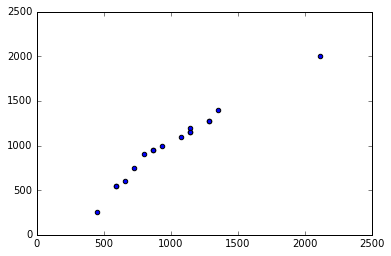

In [99]:
# Make predictions for your X_test data
plt.scatter(ols.predict(train_X),train_Y)

import sklearn.metrics
sklearn.metrics.r2_score(ols.predict(train_X),train_Y)

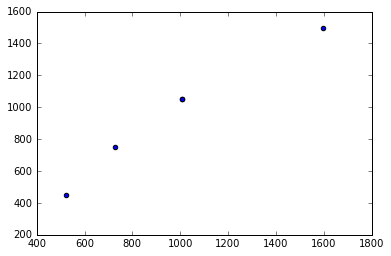

In [103]:
# Zip these predictions with the correct answers (Y_test) and compare
# them visually. You could graph them too if you want to.
pd.DataFrame(zip(ols.predict(test_X),test_Y))
plt.scatter(ols.predict(test_X),test_Y)

In [104]:
# sklearn.metrics.median_absolute_error to get a sense of how
# far wrong it was
sklearn.metrics.median_absolute_error(ols.predict(train_X),train_Y)

45.49457994579916

In [115]:
# Try the same with a sklearn.dummy.DummyRegressor() and 
# sklearn.tree.DecisionTreeRegressor()

import sklearn.dummy as dum
ols = dum.DummyRegressor()
ols.fit(train_X,train_Y)
print 'dummy: ', ols.score(train_X, train_Y)
print 'dummy: ', sklearn.metrics.median_absolute_error(ols.predict(train_X),train_Y)

import sklearn.tree as lm
ols = lm.DecisionTreeRegressor()
ols.fit(train_X,train_Y)
print 'tree: ', ols.score(train_X, train_Y)
print 'tree: ', sklearn.metrics.median_absolute_error(ols.predict(train_X),train_Y)


dummy:  0.0
dummy:  252.941176471
tree:  0.99936170013
tree:  0.0


In [129]:
import sklearn.linear_model as lm

clf = sklearn.grid_search.GridSearchCV(ols,{'max_depth':range(1,10)})

clf.fit(train_X,train_Y)
clf.best_estimator_.max_depth


5